## Exercise Interpolation

In [2]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

1) Plot these four points (2,3), (3,1), (4,2), (5,2).

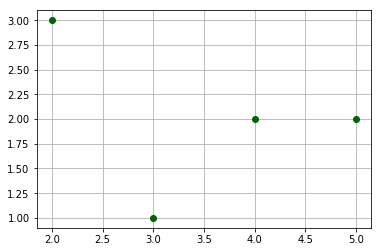

In [7]:
xs = [2,3,4,5]
ys = [3,1,2,2]
plt.plot(xs,ys,color = 'darkgreen',linestyle ='none',marker='o')
plt.grid()



2) Find the polynomial of degree 3 that pass through these four points. Plot to verify.

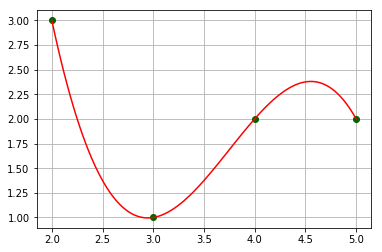

In [15]:
x = [2,3,4,5]
y = [3,1,2,2]
plt.plot(x,y,color = 'darkgreen',linestyle ='none',marker='o')
xs = np.linspace(2,5,100)
ys= 3*(((xs-3)*(xs-4)*(xs-5))/-6) + (((xs-2)*(xs-4)*(xs-5))/2) + 2*(((xs-5)*(xs-2)*(xs-3))/-2) + 2*(((xs-2)*(xs-3)*(xs-4))/6)
plt.plot(xs,ys,color ='red')
plt.grid()
    

3) Find polynomial of degree 3 that pass through these four points. Plot to verify.

(1,2) (2,0) (3,2) (7,1)

4) Write a function `ledendre(x)` which compute the legendre polynomial given the list of x values in xs and y values in ys.

`legendre(1.5)`

should have the same value as the polymial you found in 3) evaluated at x=1.5.

For those of you who know functional programming try write a functor that return a polynomial.

In [21]:
def make_legendre(xs, ys):
    def legendre(x):
        result = 0
        for ix1, x1 in enumerate(xs):
            w = 1
            for ix2, x2 in enumerate(xs):
                if ix1 != ix2:
                    w*=(x-x2)/(x1-x2)
            result += w*ys[ix1]
        return result
    return legendre

5) Now sample 11 points  from $f(x) = \sin(x)$ for for $x\in[0, \pi]$. Plot $\sin(x)$ along with those 11 points. Make sure your $\sin(x)$ is plotted with more than 100 points

In [ ]:
xs = np.linspace(0,math.pi,11)
ys = np.sin(200*xs)
plt.plot()

6) Plot legendre polynomial for these points. How similar is it to $\sin(x)$ function. Make sure your legendre is plotte with at least 100 points.

7) Now sample 11 points  from $f(x) = \sin(200x)$ for for $x\in[0, \pi]$. Plot $\sin(200*x)$ along with those 11 points. Note the 200. Then plot legendre polynomial for these points.

8) Does it pass through all the point? Does it look like the original function?

## Exercise Integration

0) What is $$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

In [55]:
from scipy.integrate import quad
def f(x):
    return x**3

quad(f,1,3)

(20.0, 2.220446049250313e-13)

In [46]:
def f(x):
    return x**3
def trapezoid(f,a,b,n):
    h = (b-a)/n
    summ=0
    for i in range(1,n):
        summ += f(a+ (i*h))
        
    return (h/2)*(f(a)+(2*summ)+f(b))

1)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 1 piece.

In [49]:
trapezoid(f,1,3,1)

28.0

2)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 100 pieces.

In [48]:
trapezoid(f,1,3,100)

20.0008

3) What is the bound on error for 1)?

In [57]:
#3**4/4 - 1/4
#using the formula : trapezoid +- (b-a)^3/12n^2 * f"(§) where § is [1,3] in part 1
((3-1)**3)/(12) * (6*3)

12.0

4) What is the bound on error for 2)?

In [59]:
((3-1)**3)/(12*(100**2)) * (6*3)

0.0012000000000000001

5) Compute the following integral
$$ \int \limits_{x=0}^{x=1} e^{-x} \sin(x^2) \; dx $$

using 100 sub divisions. This is one of those integral you can't do by hands. 

In [64]:
def f(x):
    return math.exp(-x) * math.sin(x**2)

trapezoid(f,0,1,100)


0.15091330026867264

6) If we want compute
$$ \int \limits_{x=0}^{x=1} e^{-x} \; dx $$
that is at most $10^{-6}$ away from the real answer. How many subdivisions do we need?

In [68]:
def f(x):
    return math.exp(-x)
# 1/n^2 = 10^(-6)

trapezoid(f,0,1,1000)

0.6321206115052712

7) Compute the integral above and make sure your answer is at most $10^{-6}$ away from the real answer. 

In [67]:
trapezoid(f,0,1,1000)

0.6321206115052712